在前一章中，我们探索了一类具有简单分析和计算属性的回归模型。我们现在考虑用于解决分类问题类似的模型。在分类的中的目标是取一个输入向量$\mathbf{x}$，分配一个$K$个离散类别$\mathcal{C}_k$，其中$k=1,\cdots,K$。在大多数场景中，类别都是互不相交的，所以对于每个输入会分配一个，只有一个类别。输入空间被划分的决策区域的边界被称作决策边界，或决策平面。在本章中，我们考虑线性分类模型，这意味着决策平面是输入向量$\mathbf{x}$的线性组合，因此可以通过$(D-1)$维度的超平面来定义$D$维输入空间。数据集的类别可以很精确地被线性鞠策平面分开，这就说成是线性分离。

对于回归问题，目标变量$\mathbf{t}$是简单的实数值向量，是要预测的值。在分类问题中，有很多使用目标值表示类别标签的方法。对于概率模型，最方便的是，在二分类问题中，就是二进制表示，它由一个单目标变量$t \in \{0,1\}$，这个时候$t=1$表示的是类别$\mathcal{C}_1$，$t=0$表示的是类别$\mathcal{C}_2$。我可以将$t$值解释为概率，它的类别为$\mathcal{C}_1$，概率值只取极值0和1。对于$K>2$的类别，很方面使用1-of-K编码，$\mathbf{t}$是长度为$K$的向量，如果该类别是$\mathcal{C}_j$，那么$\mathbf{t}$中的所有元素$t_k$都是0，处理元素$t_j$，它的取值为1。比如，如果我们有$K=5$个类别，那么类别2的模式给出如下的目标向量

$$\mathbf{t} = \bigr(0,1,0,0,0\bigr)^{\mathsf{T}}$$

同样，我们可以将值$t_k$解释类别为$\mathcal{C}_k$的概率。对于非概率模型，目标变量表示的替代选择有时候会很方面。

在第一章，我们确定了三种不同方法的类别问题。最简单的方法是构造一个判别函数，直接将每个向量$\mathbf{x}$分配给一个特定类别。然而，一个更强大的方法就是在推理阶段对条件概率分布$p(\mathcal{C}_k\mid\mathbf{x})$进行建模，然后使用这个分布做出最佳决策。正如1.5.4讨论的，通过分离推断和决策，我们获得了很多益处。有两种不同的方法定义条件概率$p(\mathcal{C}_k\mid\mathbf{x})$。一种方法就是直接建模，比如，通过参数化模型表示，然后使用训练集优化参数。取而代之的，我们可以采用一个通用的方法，就是建模由$p(\mathbf{x}\mid\mathcal{C}_k)$给出的条件概率魔都，协同类别先验概率$p(\mathcal{C}_k)$，然后使用贝叶斯定义计算需要的后验概率

$$p(\mathcal{C}_k\mid\mathbf{x}) = \frac{p(\mathbf{x}\mid\mathcal{C}_k)p(\mathcal{C}_k)}{p(\mathbf{x})}$$

在本章我们会讨论所有三种方法的例子。

考虑第三章中的线性回归模型，模型预测$y(\mathbf{x},\mathbf{w})$是由参数为$\mathbf{w}$的线性函数给出的。在最简单例子中，模型在输入变量中依然是线性的，因此取形式$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$，所以$y$是一个实数。对于分类问题，我们希望预测离散类别标签，或更一般地位于范围内$(0,1)$的后验概率。为了实现这个，我们考虑这个模型的推广，我们使用非线性函数$f(\cdot)$来变换$\mathbf{w}$的线性函数

$$y(\mathbf{x}) = f(\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0)$$

在机器学习$f(\cdot)$中，它就是激活函数，而它的逆在统计学中称作链接函数。决策平面相应的是$y(\mathbf{x}) = \text{const}$，所以$\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0 = \text{const}$，因此决策平面是$\mathbf{x}$的线性函数，即使函数$f(\cdot)$是非线性的。基于这点，4.3描述的类别模型被称作广义线性模型（McCullagh和Nelder，1989年）。注意，即跟回归使用的模型相比，由于非线性函数$f(\cdot)$的存在，它们在参数中已不再是线性。它们要比线性回归模型，有更加复杂的分析和计算特性。尽管如此，这些模型相比后续章节要研究的更一般的非线性模型，还是相当简单的。

就像我们在第三章中对回归模型所做的那样，如果我们先使用基函数$\phi(\mathbf{x})$的向量对输入变量进行固定非线性变换，本章讨论的算法同样适用。

#### 4.1 判别函数

判别函数是取以输入向量$\mathbf{x}$，分配类别1-of-K，记作$\mathcal{C}_k$。在本章，我们将限制于线性判别，它们的决策平面一般是超平面。为了简化讨论，我们先考虑二分类的例子，然后再扩展到$K > 2$的类别。

#### 4.1.1 二分类

线性判别函数的最简单表示就是通过取一个输入项链的线性函数得到的

$$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$$

其中$\mathbf{w}$被称作权重向量，$w_0$是偏置（不要与统计中的变差相混淆）。负偏置有时候被称作阈值。如果$y(\mathbf{x}) \ge 0$，输入向量$\mathbf{x}$就被分配类别$\mathcal{C}_1$，否则就是类别$\mathcal{C}_2$。其相应的决策边界是由$y(\mathbf{x})=0$定义的，在$D$维输入空间中对应的$D-1$维度的超平面。考虑在决策平面上的两个点$\mathbf{x}_A$和$\mathbf{x}_B$。因为$y(\mathbf{x}_A)=y(\mathbf{x}_B)=0$，我们有$\mathbf{w}^{\mathsf{T}}(\mathbf{x}_A-\mathbf{x}_B)=0$，因此向量$\mathbf{w}$正交于在决策平面内的每个向量，因此$\mathbf{w}$定义了决策平面的方向。类似地，如果$\mathbf{x}$是决策平面上的点，那么$y(\mathbf{x})=0$，所以从原点到决策平面上的距离给出如下

$$\frac{\mathbf{w}^{\mathsf{T}}\mathbf{x}}{\|\mathbf{w}\|} = -\frac{w_0}{\|\mathbf{w}\|}$$

因此，我们看到偏置参数$w_0$定义了决策平面的位置。图中4.1中$D=2$的例子中绘画出了这些性质。

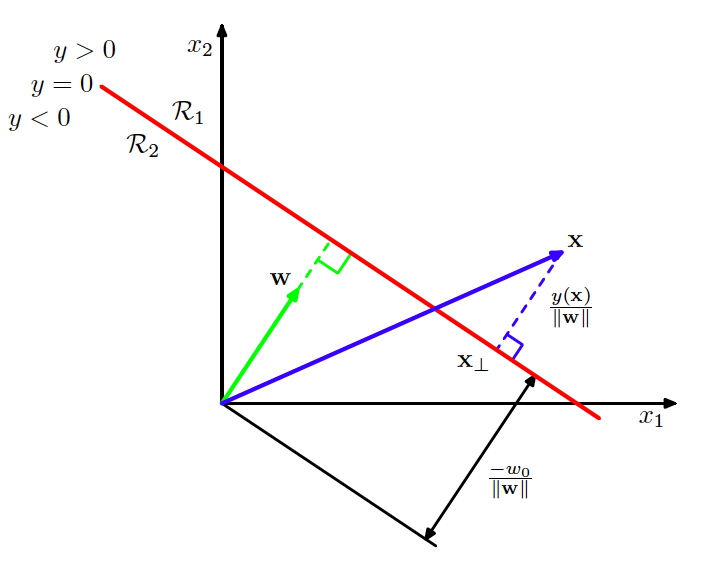

<center>图4.1 图中画的是二维线性判别函数的几何图例。如图红色显示的绝平面，垂直于参数$\mathbf{w}$，它从原点的位置是由偏置参数$w_0$控制的，同时，一般点$\mathbf{x}$与决策平面的正交距离由$y(\mathbf{x})/\|\mathbf{w}\|$给出。</center>

此外，我们注意到$y(\mathbf{x})$的值给出一个从点$\mathbf{x}$到决策平面的垂直距离$r$的符号度量。为了弄明白这个，我们考虑任一点$\mathbf{x}$，让$\mathbf{x}_{\perp}$为在决策平面上的正交投影，所以有

$$\mathbf{x} = \mathbf{x}_{\perp} + r\frac{\mathbf{w}}{\|\mathbf{w}\|}$$

两边乘以$\mathbf{w}_{\mathsf{T}}$，并加上$w_0$，使用$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0$和$y(\mathbf{x}_{\perp})=\mathbf{w}^{\mathsf{T}}\mathbf{x}_{\perp} + w_0$，我们有

$$r = \frac{y(\mathbf{x})}{\|\mathbf{w}\|}$$

结果如图4.1所示。

正如第三章中的线性回归模型，有时为了方便会使用更紧凑的符号来介绍额外的输入值$x_0$，那么定义$\tilde{\mathbf{w}}=(w_0,\mathbf{w})$和$\tilde{\mathbf{x}}=(x_0,\mathbf{x})$，所以有

$$y(\mathbf{x}) = \tilde{\mathbf{w}}^{\mathsf{T}}\tilde{\mathbf{x}}$$

在本例中，决策平面是$D$维经过原点的$D+1$扩展的输入空间的超平面。

#### 4.1.2 多分类

现在考虑线性判别的扩展$K>2$个类别。我们可能会被诱导着通过组合多个二分类判别函数来创建一个$K$类别判别。然而，这其实是很困难的（Duda和Hart，1973年）如现在我们显示的。

考虑使用$K-1$分类器，每个都是用一个解决二分类问题：将特定类别$\mathcal{C}_k$中的点与其它不是在这个类别中的点区分开。这是一个one vs rest分类器。图4.2中的左边部分的例子展示了一个包含三个类别的例子，这种方法导致输入空间的区域被模糊分类。

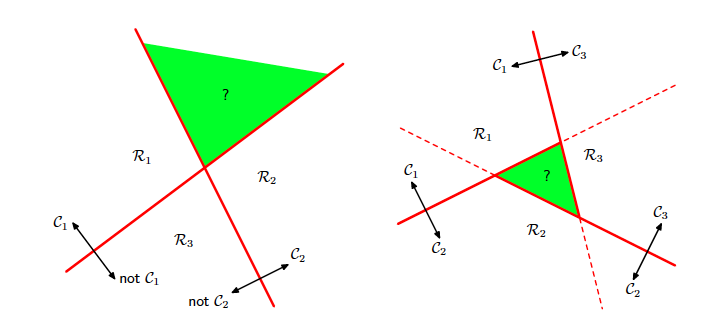

<center>图4.2 尝试从一个二分类判别集合中构建一个$K$类别的判别，实会导致模糊区域的产生的，如图绿色显示。左边的例子包含二个判别器的使用用来区分在$\mathcal{C}_k$中的点，和不在$\mathcal{C}_k$中的点。右边例子是包含三个判别函数，每个被用来区分$\mathcal{C}_k$和$\mathcal{C}_j$类别对。</center>

另一种方法是引入$K(K-1)/2$二进制判别函数，一对每个可能的类别对。这被称为one vs one分类器。每个点是根据这些判别函数中的大多胡搜投票来分类的。但，如图4.2所示这还是会产生模糊区域的问题。

我们可以通过考虑由$K$个线性函数组成的单个$K$类别判别形式来避免这些难点

$$y_k(\mathbf{x})=\mathbf{w}_k^{\mathsf{T}}\mathbf{x}+w_{k0}$$

那么分配一个点$\mathbf{x}$到类别$\mathcal{C}_k$，如果对于所有的$j≠k$，$y_k(\mathbf{x}) > y_j(\mathbf{x})$。在类别$\mathcal{C}_k$和$\mathcal{C}_j$之间的决策边界，因而是由$y_k(\mathbf{x})=y_j(\mathbf{x})$给出的，因此相应的$(D-1)$维超平面定义如下

$$(\mathbf{w}_k - \mathbf{w}_j)^{\mathsf{T}}\mathbf{x} + (w_{k0} - w_{j0}) = 0$$

这与4.1.1节中讨论的两类情形的决策边界具有相同的形式，因此适用于类似的几何性质。

这种判别式的决策区域总是单独连通和凸的。为了弄明白这个，考虑两个都在决策区域$\mathcal{R}_k$上的点$\mathbf{x}_A$和$\mathbf{x}_B$，如图4.3所示。任何点$\hat{\mathbf{x}}$都是可以由$\mathbf{x}_A$和$\mathbf{x}_B$两点的连线来表示

$$\hat{\mathbf{x}} = \lambda\mathbf{x}_A + (1-\lambda)\mathbf{x}_B$$

其中$0 \le \lambda \le 1$。对于线性判别函数，有如下

$$y_k(\hat{\mathbf{x}}) = \lambda y_k(\mathbf{x}_A) + (1-\lambda)y_k(\mathbf{x}_A) + (1-\lambda)y_k(\mathbf{x}_B)$$

因为$\mathbf{x}_A$和$\mathbf{x}_B$都是在$\mathcal{R}_k$，它遵循$y_k(\mathbf{x}_A) > y_j(\mathbf{x}_A)$，和$y_k(\mathbf{x}_B) > y_j(\mathbf{x}_B)$，对于所有$j ≠ k$，因此$y_k(\hat{\mathbf{x}}) > y_j(\hat{\mathbf{x}})$，所以$\hat{\mathbf{x}}$也会在$\mathcal{R}_k$内。因此$\mathcal{R}_k$是单连通且是凸的。

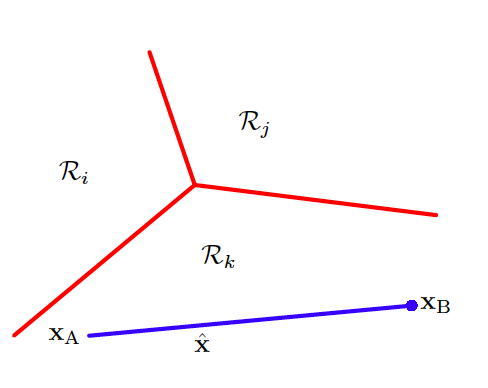

<center>图4.3 图中画的是多分类线性判别的决策区域，在决策边界内显示的是红色。如果两个点在同一个决策区域$\mathcal{R}_k$内，那么由这两点连接成的直线上的任何点$\hat{\mathbf{x}}$也都在区域$\mathcal{R}_k$上，因此决策区域应该是单连通且是凸的。</center>

需要注意的是对于二分类，我们可以讨论这里使用的形式，基于两个判别函数$y_1(\mathbf{x}_1)$和$y_2(\mathbf{x}_2)$，要么使用在4.1.1节中描述的基于但判别函数$y(\mathbf{x})$等价简单型。

我们现在可以探索三种学习线性判别函数参数的方法，基于最小二乘，Fisher线性判别和感知机算法。

#### 4.1.3 分类的最小二乘

在第三章，我们考虑的模型是参数的线性函数，我们看到误差函数的最小平方和会得到参数值的简单闭合解。因此，我们很想看看我们是否可以用同样的形式来处理分类问题。考虑一个通用的$K$分类问题，对目标向量$\mathbf{t}$采用1-of-K编码方案。在这样的上下文中使用最小二乘的一个理由是，它给出近似输入向量的目标值的条件期望$\mathbb{E}[\mathbf{t} \mid \mathbf{x}]$。对于二进制编码方案，条件期望是由后验类概率向量给出的。不幸的是，尽管，这些概率的一般进度都相当差，实际上近似的值都是在$(0,1)$之外的，等会儿我们会看到线性模型的灵活性限制。

每个类$\mathcal{C}_k$被描述成如下线性模型

$$y_k(\mathbf{x}) = \mathbf{w}_k^{\mathsf{T}}\mathbf{x} + w_{k0}$$

其中$k=1,\cdots,K$。我们可以将这些这些向量符号组合在一起

$$y(\mathbf{x}) = \mathbf{\widetilde{W}}^{\mathsf{T}}\mathbf{\widetilde{x}}$$

其中$\mathbf{\widetilde{W}}$是一个矩阵，它的第$k$列是由$D+1$维向量$\tilde{w}_k=(w_{k0},\mathbf{w}_k^{\mathsf{T}})^{\mathsf{T}}$组成，$\mathbf{\widetilde{x}}$是一个对应的带有输入$x_0=1$的增广输入向量$(1,\mathbf{x}^{\mathsf{T}})^{\mathsf{T}}$。这个表示已经在第3.1节详细讨论过。一个新输入$\mathbf{x}$会被分配的输出$y_k=\mathbf{\widetilde{w}}^{\mathsf{T}}\mathbf{\widetilde{x}}$是最大的类别。

我们现在通过最小化平方和误差函数来定义参数矩阵$\mathbf{\widetilde{W}}$，就如第三章中对回归那样。考虑一个训练数据集$\{\mathbf{x}_n,\mathbf{t}_n\}$，其中$n=1,\cdots,N$，定义一个矩阵$\mathbf{T}$，它的第$n_{\text{th}}$行是向量$\mathbf{t}_n^{\mathsf{T}}$，同时有向量$\mathbf{\widetilde{X}}$，$n_{\text{th}}$行是$\mathbf{x}_n^{\mathsf{T}}$。平方误差函数可以写作如下

$$E_D\bigr(\mathbf{\widetilde{W}}\bigr) = \frac{1}{2}\text{Tr}\Bigr\{\bigr(\mathbf{\widetilde{X}}\mathbf{\widetilde{W}} - \mathbf{T}\bigr)^{\mathsf{T}}\bigr(\mathbf{\widetilde{X}}\mathbf{\widetilde{W}} - \mathbf{T}\bigr)\Bigr\}$$

设对$\mathbf{\widetilde{W}}$的导数为0，整理，我们得到$\mathbf{\widetilde{W}}$的解如下

$$\mathbf{\widetilde{W}} = \bigr(\mathbf{\widetilde{X}}^{\mathsf{T}}\mathbf{\widetilde{X}}\bigr)^{-1}\mathbf{\widetilde{X}}^{\mathsf{T}}\mathbf{T} = \mathbf{\widetilde{X}}^{\dagger}\mathbf{T}$$

其中$\mathbf{\widetilde{X}}^{\dagger}$是矩阵$\mathbf{\widetilde{X}}$的伪逆，正如3.1.1解讨论过的。我们可以得到判别函数的形式

$$\mathbf{y}\bigr(\mathbf{\mathbf{x}}\bigr) = \mathbf{\widetilde{W}}^{\mathsf{T}}\mathbf{\widetilde{x}} = \mathbf{T}^{\mathsf{T}}\bigr(\mathbf{\widetilde{X}}^{\dagger}\bigr)^{\mathsf{T}}\mathbf{\widetilde{x}}$$

多目标变量最小二乘解的一个有趣性质是如果训练集中的每个目标向量满足一些线性条件

$$\mathbf{a}^{\mathsf{T}}\mathbf{t}_n + b = 0$$

对于某些常量$a$和$b$，模型预测的任何值$\mathbf{x}$满足同样的约束

$$\mathbf{a}^{\mathsf{T}}\mathbf{y}(\mathbf{x}) + b = 0$$

因此对于$K$分类使用1-of-K编码方案，模型做出的预测会有这样的特性，就是对于任意$\mathbf{x}$值，$\mathbf{y}(\mathbf{x})$中的元素加和为1。尽管，单独加和约束并不满足允许模型输出被解释为概率，是因为它们并没有被约束在区间$(0,1)$范围内。

最小二乘方法给出了一个判别函数参数的确切的闭合解。但是，尽管作为判别函数（我们用直接用来做决策的，而不是使用概率解释）它也会遇到一些严重问题。我们以及看到最小二乘解对于异常来说缺少鲁棒性，这与分类应用时一样的，如图4.4画的那样。这里我们看到右图汇中的额外数据点产生了一个在决策边界位置上的有趣的变化，在左图中，即使这些点被原始决策边界正确划分了。平方误差函数会惩罚预测太好的，是因为它们位于决策边界正确的以便。在7.1.2节，我们将考虑一些分类的替代误差函数，那时将看到它们就不会遇到这些问题。

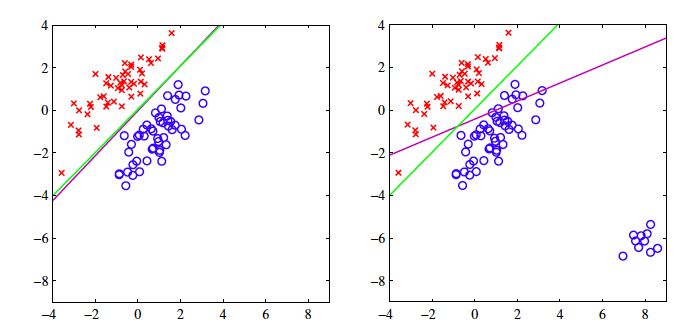

<center>图4.4 左图显示的是二分类的数据，由红色叉和绿色环表示，通过最小二乘（洋红曲线）找到的决策边界，和通过逻辑回归模型（绿色曲线），我们会在4.3.2节中讨论。右图中显示的在对应的左下角添加一些额外的点，展示出最小二乘是对异常点高度敏感的，不像逻辑回归。</center>

如图4.5所示，最小二乘问题是比简单缺少鲁棒性更加严重的。这显示了在二维输入空间$(x_1,x_2)$采样自三个类别的合成数据集，有这样的性质，就是线性鞠策边界可以类别间的最佳分隔。实际上，本章后面的描述的逻辑回归技术，会给出如右图看到的统计解。然而，最小二乘给出的解很差，只有少部分的输入空间区域被分类给绿色类别。

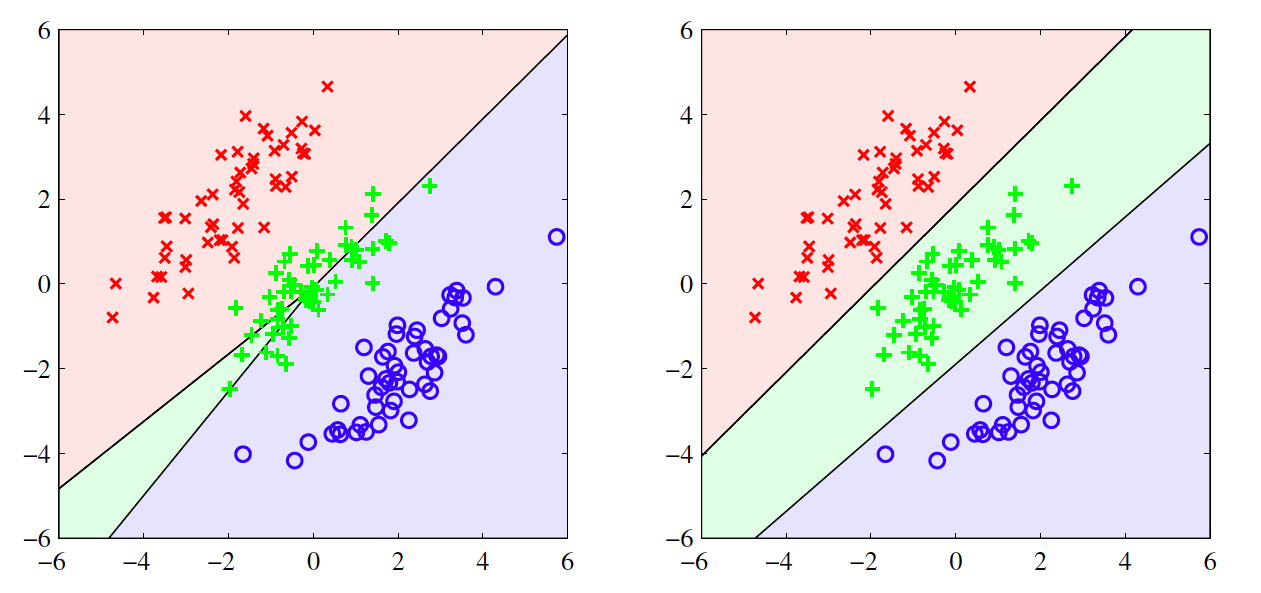

<center>图4.5 三个类别组成的合成数据集的例子，用红色（x），绿色（+）和蓝色（o）表示的训练集。直线表示的是决策边界，背景颜色表示的是各自的决策区域的类别。左边是使用最小二乘判别的结果。我们看到输入空间的区域分配给绿色类别的太小，这个类别的大多数点都被误分类了。左边是使用4.3.2中的扩及回归的结果显示的是训练数据的正确类别。</center>

最小二乘的失败对我们来说并不惊讶，回想一下在高斯条件分布假设下其对应的最大似然。通过采用更合适的概率模型，我们将得到比最小二乘更好性质的分类技术。此时，我们还是会继续探索对于线性分类模型中参数设置的替代非概率方法。

#### 4.1.4 Fisher线性判别

一种可可是线性分类模型的方法就是维度约减。先考虑二分类问题的例子，假设我们$D$维度的输入向量$\mathbf{x}$，将其映射到一维使用

$$y=\mathbf{w}^{\mathsf{T}}\mathbf{w}$$

如果我们设定一个$y$的阈值，若$y \ge -w_0$，分类为$\mathcal{C}_1$，否则为类别$\mathcal{C}_2$，那么我们就得到之前章节讨论的标准线性分类。一般地，映射到一维会导致一个可考虑到的信息丢失，在原始$D$维空间中被很好划分的类别，在一维中可能会重叠得厉害。但通过调整权重向量$\mathbf{w}$的组合，我们可以选择的投影是最大化类间距。起始，考虑一个有着$N_1$个点的类别$\mathcal{C}_1$，和$N_2$的类别$\mathcal{C}_2$，所以二分类向量的均值如下给出

$$\mathbf{m}_1 = \frac{1}{N_1}\sum_{n\in\mathcal{C}_1}\mathbf{x}_n, \hspace{0.5cm} \mathbf{m}_2 = \frac{1}{N_2}\sum_{n\in\mathcal{C}_2}\mathbf{x}_n$$

当映射到$\mathbf{w}$上，最简单的类别度量，就是映射类别均值的分隔。这就需要我们选择一个$\mathbf{w}$使得如下最大化

$$m_2 - m_1 = \mathbf{w}^{\mathsf{T}}(\mathbf{m}_2 - \mathbf{m}_1)$$

其中

$$m_k = \mathbf{w}^{\mathsf{T}}\mathbf{m}_k$$

是类别$\mathcal{C}_k$映射数据的均值。然而，只要增加$\mathbf{w}$的大小，这个表达式就可以变得任意大。为了解决这个问题，我们可以限制$\mathbf{w}$的长度为单位长度，所以有$\sum_iw_i^2=1$。使用拉格朗日乘子执行约束最大化，我们会找到$\mathbf{w} \propto (\mathbf{m}_2-\mathbf{m}_1)$。如图4.6所示的，这种方法会有一个问题。这里显示的两类在原始二维空间$(x_1,x_2)$都被很好地分开了，但当投影到它们均值连接的直线上时，它们有相当大的重叠。难点是来自强非对角协方差。Fisher提出的想法是最大化映射类别均值，同时最小化每个类别方差，以最大限度避免类重叠。

投影公式4.20将带标签数据点集合转换为一维空间$y$中的带标签集合。从类别$\mathcal{C}_k$的转换数据的类内方差由如下给出

$$s_k^2 = \sum_{n\in\mathcal{C}_k}\bigr(y_n-m_k\bigr)^2$$

其中$y_n=\mathbf{w}^{\mathsf{T}}\mathbf{x}_n$。我们定义所有数据集的类内方差，以简化成$s_1^2+s_2^2$。Fisher标准被定义成类间方差与类间方差之比，给出如下

$$J(\mathbf{w}) = \frac{(m_2-m_1)^2}{s_1^2 + s_2^2}$$

通过使用4.20，4.23和4.24重写Fisher准则，可以使得对$\mathbf{w}$的依赖变得显式

$$J(\mathbf{w})=\frac{\mathbf{w}^{\mathsf{T}}\mathbf{S}_B\mathbf{w}}{\mathbf{w}^{\mathsf{T}}\mathbf{S}_W\mathbf{w}}$$

其中$\mathbf{S}_B$是类间协方差矩阵，由如下给出

$$\mathbf{S}_B=\bigr(\mathbf{m}_2-\mathbf{m}_1\bigr)\bigr(\mathbf{m}_2-\mathbf{m}_1\bigr)^{\mathsf{T}}$$

$\mathbf{S}_W$是整体类间协方差矩阵，给出如下

$$\mathbf{S}_W = \sum_{n\in\mathcal{C}_1}\bigr(\mathbf{x}_n-\mathbf{m}_1\bigr)\bigr(\mathbf{x}_n-\mathbf{m}_1\bigr)^{\mathsf{T}} + \sum_{n\in\mathcal{C}_2}\bigr(\mathbf{x}_n-\mathbf{m}_2\bigr)\bigr(\mathbf{x}_n-\mathbf{m}_2\bigr)^{\mathsf{T}}$$

关于$\mathbf{w}$的微分4.26，我们找到当如下成立$J(\mathbf{w})$是最大化

$$\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{S}_B\mathbf{w}\bigr)\mathbf{S}_W\mathbf{w}=\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{S}_W\mathbf{w}\bigr)\mathbf{S}_B\mathbf{w}$$

从4.27中，我们看到$\mathbf{S}_B\mathbf{w}$总是与$(\mathbf{m}_2-\mathbf{m}_1)$是同方向的。此外，我们并不关心$\mathbf{w}$的大小，只关心它的方向，所以我们可以去掉常量因子$\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{S}_B\mathbf{w}\bigr)$和$\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{S}_W\mathbf{w}\bigr)$。在4.29两边乘以$\mathbf{S}_W^{-1}$，我们得到

$$\mathbf{w}\propto\mathbf{S}_{W}^{-1}\bigr(\mathbf{m}_2-\mathbf{m}_1\bigr)$$

需要注意的是如果类内协方差是各向同性的，那么$\mathbf{S}_{W}$是与单元矩阵成比例的，我们发现$\mathbf{w}$是与类均值的差成比例的，这也如我们上述讨论的。

4.30的结果就是熟知的Fisher线性判别，尽管严格地来说，它并不是一个判别，而是投影数据到特定维度维度方向的选择。尽管，后面投影数据会用来重构判别式，通过选择一个阈值$y_0$，当$y(\mathbf{x}) \ge y_0$，以便将一个新点归类为$\mathcal{C}_1$，否则将其归类为$\mathcal{C}_2$。例如，我们可以使用高斯分布来建模类条件密度$p(y\mid\mathcal{C}_k)$，然后使用1.2.4节使用的技术通过最大似然来找到高斯分布的参数。当找到高斯近似到投影的类别，1.5.1节的形式就会给出最优阈值的表达式。高斯假设的一些判断来自中心极限定理，指出$y=\mathbf{w}^{\mathsf{T}}\mathbf{x}$是一组随机变量的和。

#### 4.1.5 关联到最小二乘

最小二乘方法的线性判别的定义是基于模型预测的目标尽量接近目标数据集。相比而言，Fisher标准是通过最大化输出空间中的类间距得到的。特别是，我们会证明，对于二分类问题，Fisher标准可以作为最小二乘的一个特例来获得。

迄今我们考虑了1-of-K的目标编码。如果，我们采用一个稍微不同的目标编码方案，那么权重的最小二乘解会等价于Fisher解（Duda和Hart，1973年）。特别是，我们将取类别$\mathcal{C}_1$的目标为$N/N_1$，其中$N_1$是类别$\mathcal{C}_1$的数目，$N$是所有模式的数目。目标值近似于类别$\mathcal{C}_1$的先验概率的倒数。类别$\mathcal{C}_2$，我们取目标为$-N/N_2$，其中$N_2$是类别$\mathcal{C}_2$的模式数目。

平方误差函数可以写成如下

$$E=\frac{1}{2}\sum_{n=1}^N\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{x}_n + w_0 - t_n\bigr)^2$$

设置对$w_0$和$\mathbf{w}$的$E$的求导，并令其为0，我们各自有

$$\sum_{n=1}^N\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{x}_n + w_0 - t_n\bigr) = 0$$

$$\sum_{n=1}^N\bigr(\mathbf{w}^{\mathsf{T}}\mathbf{x}_n + w_0 - t_n\bigr)\mathbf{x}_n = 0$$

从4.32，使用我们选择的目标编码源$t_n$，我们得到偏置表达式的形式

$$w_0 = -\mathbf{w}^{\mathsf{T}}\mathbf{m}$$

其中我们使用

$$\sum_{n=1}^Nt_n = N_1\frac{N}{N_1} - N_2\frac{N}{N_2} = 0$$

其中$\mathbf{m}$是所有数据集的均值，给出如下

$$\mathbf{m} = \frac{1}{N}\sum_{n=1}^N\mathbf{x}_n=\frac{1}{N}\bigr(N_1\mathbf{m}_1+N_2\mathbf{m}_2\bigr)$$

在一些明显的线代后，再次使用$t_n$，4.33的第二个等式会变成

$$\bigr(\mathbf{S}_{\mathbf{W}} + \frac{N_1N_2}{N}\mathbf{S}_B\bigr)\mathbf{w}=N\bigr(\mathbf{m}_1-\mathbf{m}_2\bigr)$$

其中$\mathbf{S}_{\mathbf{W}}$由4.28定义，$\mathbf{S}_{\mathbf{W}}$由4.27定义，我们代入4.34使用的偏置。用4.27，我们注意到$\mathbf{S}_{\mathbf{B}}\mathbf{w}$总是与$\bigr(\mathbf{m}_2-\mathbf{m}_1\bigr)$同方向的。因此我们可以写成

$$\mathbf{w}\propto\mathbf{S}_{W}^{-1}\bigr(\mathbf{m}_2-\mathbf{m}_1\bigr)$$

其中我们忽略了非相关常量因子。因此权重向量是从Fisher标准中发现的是已知的，另外，我们也发现偏置值$w_0$的表达式是由4.34给出的。它告诉我们，如果$y(\mathbf{x})=\mathbf{w}^{\mathsf{T}}\bigr(\mathbf{x}-\mathbf{m}\bigr)>0$，一个新向量$\mathbf{x}$应该被分类成属于类$\mathcal{C}_1$，否则则为类别$\mathcal{C}_2$。

#### 4.1.6 多分类的Fisher判别

我们现在考虑Fisher判别的泛化$K>2$的分类，我们假设$D$维度输入空间是比$K$数目分类要大的。下面，我们介绍$D'>1$线性特征$y_k=\mathbf{w}_k^{\mathsf{T}}\mathbf{x}$，其中$k=1,\cdots,D'$。这些特征值可以很方便地组成一个向量$\mathbf{y}$。类似地，圈中向来$\{\mathbf{w}_k\}$可以考虑成一个矩阵$\mathbf{W}$的列，所以

$$\mathbf{y}=\mathbf{W}^{\mathsf{T}}\mathbf{x}$$

需要注意的是我们在$\mathbf{y}$的定义中没有包含任何的偏差参数，协方差矩阵的类内泛化到$K$类别遵循4.28中给出的

$$\mathbf{S}_{\mathbf{W}} = \sum_{k=1}^K\mathbf{S}_k$$

其中

$$\mathbf{S}_k = \sum_{n\in\mathcal{C}_k}\bigr(\mathbf{x}_n-\mathbf{m}_k\bigr)\bigr(\mathbf{x}_n-\mathbf{m}_k\bigr)^{\mathsf{T}}$$

$$\mathbf{m}_k = \frac{1}{N_k}\sum_{n\in\mathcal{C}_k}\mathbf{x}_n$$

$N_k$是类别$\mathcal{C}_k$的模式数目。为了找到类间协防矩阵的泛化，我们跟从Duda和Hart（1973年），首先考虑协方差矩阵

$$\mathbf{S}_{\mathsf{T}} = \sum_{n=1}^N\bigr(\mathbf{x}_n-\mathbf{m}\bigr)\bigr(\mathbf{x}_n-\mathbf{m}\bigr)^{\mathsf{T}}$$

其中$\mathbf{m}$是所有数据集的均值

$$\mathbf{m}=\frac{1}{N}\sum_{n=1}^N\mathbf{x}_n=\frac{1}{N}\sum_{k=1}^KN_k\mathbf{m}_k$$

$N=\sum_kN_k$是所有数据点的数目。所有的协方差矩阵可以分解成类内协方差矩阵之和，由4.40和4.41给出，加上一个额外的矩阵$\mathbf{S}_{\mathbf{B}}$，我们认为这是类间协方差的一种度量

$$\mathbf{S}_{\mathsf{T}} = \mathbf{S}_{\mathbf{W}} + \mathbf{S}_{\mathbf{B}}$$

其中

$$\mathbf{S}_{\mathbf{B}} = \sum_{k=1}^KN_k(\mathbf{m}_k - \mathbf{m})(\mathbf{m}_k - \mathbf{m})^{\mathsf{T}}$$

这些协方差矩阵已经在原始$\mathbf{x}$空间定义了。我们现在定义一个在映射$D'$维$\mathbf{y}$空间的相似矩阵

$$\mathbf{s}_{\mathbf{W}}=\sum_{k=1}^K\sum_{n\in\mathcal{C}_k}\bigr(\mathbf{y}_n-\mathbf{\mu}_k\bigr)\bigr(\mathbf{y}_n-\mathbf{\mu}_k\bigr)^{\mathsf{T}}$$

和

$$\mathbf{s}_\mathbf{B}=\sum_{k=1}^KN_k\bigr(\mathbf{\mu}_k-\mathbf{\mu}\bigr)\bigr(\mathbf{\mu}_k-\mathbf{\mu}\bigr)$$

其中

$$\mu_k = \frac{1}{N_k}\sum_{n\in\mathcal{C}_k}\mathbf{y}_n, \hspace{0.5cm} \mathbf{\mu}=\frac{1}{N}\sum_{k=1}^KN_k\mathbf{\mu}_k$$

当类间协方差很大，类间协方差很小时，我们希望重构一个常量。现在有许多可能选择标准（Fukunaga，1990年）。一个如下给出的例子

$$J(\mathbf{w})=\text{Tr}\{\mathbf{s}_{\mathbf{W}}^{-1}\mathbf{s}_{\mathbf{B}}\}$$

而后，该准则可以被重写为投影矩阵$\mathbf{W}$的显式函数

$$J(\mathbf{w})=\text{Tr}\bigr\{\bigr(\mathbf{WS_w}\mathbf{W}^{\mathsf{T}}\bigr)^{-1}\bigr(\mathbf{WS_B}\mathbf{W}^{\mathsf{T}}\bigr)\bigr\}$$

最大化这个准则也很明显，尽管会牵扯到，在Fukunaga（1990年）一书中对此进行了详细的讨论。权重值是由这些$\mathbf{S_W}^{-1}\mathbf{S_B}$的相应的$D'$最大特征值的特征向量所定义的。

有一个重要的结果，对于所有标准是通用的，这是值得强调的。首先，我们要注意的在4.46中，$\mathbf{S_B}$是由$K$个矩阵之和组成的，每个都是两向量的外积，其秩为1。另外，由于4.44的约束，这些矩阵中只有$(K-1)$是独立的。因此，$\mathbf{S_B}$的秩几乎是等价于$(K-1)$，几乎有$(K-1)$个非0特征值。这表明，由$\mathbf{S_B}$的特征向量构成的$(K-1)$维子空间上的投影并不会改变$J(\mathbf{w})$的值，因此用这种方法找不到$(K-1)$更多的线性特征（Fukunaga，1990年）。

#### 4.1.7 感知机算法

线性判别模型的另一个例子就是Rosenblatt（1962年）的感知机，它在模式识别算法历史中也占据着重要的作用。它对应的二分类模型，其中输入向量$\mathbf{x}$首先使用一个固定的非线性变换转换为一个特征向量$\phi(\mathbf{x})$，然后用它来构造的广义线性模型形式如下

$$y(\mathbf{x})=f(\mathbf{w}^{\mathsf{T}})\phi(\mathbf{x})$$

其中非线性激活函数$f(\cdot)$是由如下分段函数给出的

$$f(a)=
\begin{cases}
+1, \hspace{0.3cm} a \ge 0 \\
-1, \hspace{0.3cm} a < 0
\end{cases}$$

向量$\phi(\mathbf{x})$一般会包含一个偏置项$\phi_0(\mathbf{x})=1$。在之前讨论的二分类问题中，我们会聚焦于目标编码方案中的$t\in\{0,1\}$在概率模型上下文中的合理性。对于感知机来说，尽管，很方便使用类别$\mathcal{C}_1$的目标值$t=+1$，类别$\mathcal{C}_2$为$t=-1$，来匹配选择的激活函数。

用于定义感知机参数$\mathbf{w}$的算法大多数很容易被误差函数最小化所激发。误差函数的自然选择就是所有误分类模式的总和。尽管，它不会导致一个简单的算法，是因为误差是一个$\mathbf{w}$的分段常量函数，只要$\mathbf{w}$的变化导致决策边界跨越其中一个数据点，就会出现间断。使用误差函数在变更$\mathbf{w}$上的方法并不适用，是因为其梯度在各处都为0。

我们因此会考虑一个替代误差函数的称作感知机。为了得到这个，我们需要注意的是我们所寻找的权重向量$\mathbf{w}$在类别$\mathcal{C}_1$中的$\mathbf{x}_n$的模式会有$\mathbf{w}^{\mathsf{T}}\phi(\mathbf{x}_n)>0$，而在类别$\mathcal{C}_2$中的模式$\mathbf{x}_n$有$\mathbf{w}\phi(\mathbf{x}_n)<0$。适用$t\in\{-1,+1\}$目标编码方案，会遵循我们希望所有的模式满足$\mathbf{w}^{\mathsf{T}}\phi(\mathbf{x}_n)t_n>0$。感知机准则关联的对于任何模式的零误差是被正确分类的，然而对于误分类模式$\mathbf{x}_n$，会尝试最小化量$-\mathbf{w}^{\mathsf{T}}\phi(\mathbf{x}_n)$。感知机标准因而给出如下

$$E_P(\mathbf{w})=-\sum_{n\in\mathcal{M}}\mathbf{w}^{\mathsf{T}}\phi_nt_n$$

其中$\mathcal{M}$表示的是所有误分类模式集合。关联到一个特殊误分类模式的误差贡献是在区域$\mathbf{w}$空间中其中模式被误分类的$\mathbf{w}$的线性函数，以及被正确分类的零区域。整个误差函数因此是分段线性的。

我们现在应用随机梯度下降算法到这个误差函数。在权重向量$\mathbf{w}$上的更新给出如下

$$\mathbf{w}^{(\tau + 1)}=\mathbf{w}^{(\tau)} - \eta\nabla E_P(\mathbf{w}) = \mathbf{w}^{(\tau)} + \eta\phi_nt_n$$

其中$\eta$是学习率，$\tau$是算法步长的整数索引。因为如果我们在$\mathbf{w}$上乘以一个常量，感知机函数$y(\mathbf{x},\mathbf{w})$是不变的，不失一般性，我们可以令学习率参数$\eta$为1。需要注意的是，权重向量会在训练阶段发生变化，被误分类的模式集合也会变化。

感知机学习算法有如下的简单解释。我们一次循环训练模式，并对每个模式$\mathbf{x}_n$评估感知器功能（4.52）。如果模式是被正确分类的，那么权重向量会保持不变，然而如果被误分类，那么对于类别$\mathcal{C}_1$，我们将向量$\phi(\mathbf{x}_n)$加入到当前权重向量$\mathbf{w}$的估计中，而对于类别$\mathbf{C}_2$则从$\mathbf{w}$中减去向量$\phi(\mathbf{x}_n)$。感知机学习算法如图4.7所示。

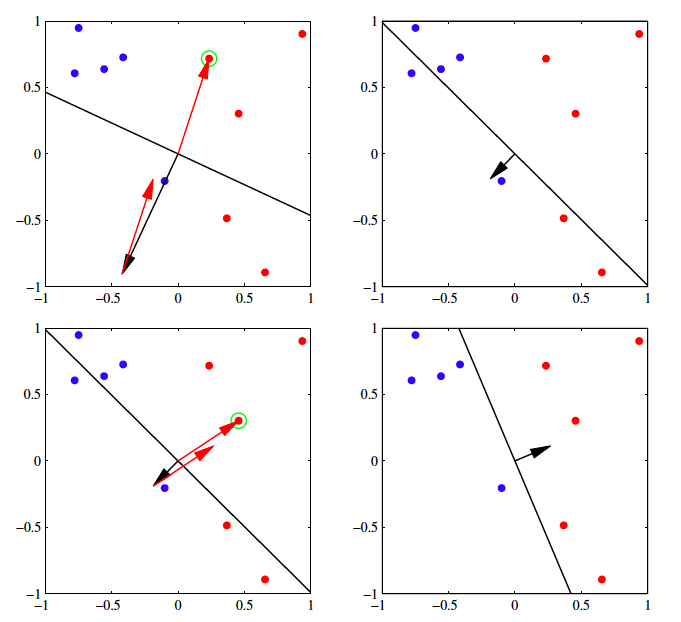

<center>图4.7 图中画的是感知机学习算法的收敛过程，显示的是二维特征空间$(\phi_1,\phi_2)$中的两个类别（红色和蓝色）的数据点。上左图中显示的是初始化参数向量$\mathbf{w}$如黑色箭头显示的，附带相应的决策边界（黑色线），朝向决策边界的点被分类为属于红色类别。带绿色环的数据点是被误分类的，所以被加入到当前权重向量的特征向量，给出了如上右图显示的新的决策边界。底部的左图显示的是下一次被考虑为误分类的点，绿色环标记的特征向量会再次被加入到权重向量给出的底部右图显示的决策边界是所有数据都被正确分类的。</center>

如果我们考虑感知机学习算法的单次更新的影响，我们看到因为4.55从误分类模式中的误差贡献会减少，我们有

$$-\mathbf{w}^{(\tau + 1)\mathsf{T}}\phi_nt_n = -\mathbf{w}^{(\tau)\mathsf{T}}\phi_nt_n - (\phi_nt_n)^{\mathsf{T}}\phi_nt_n < -\mathbf{w}^{(\tau)\mathsf{T}}\phi_nt_n$$

其中我们设置$\eta=1$，使用$\|\phi_nt_n\|^2 > 0$。当然，这不会表明从其它误分类模式的错误函数的贡献将会减少。此外，权重向量的变更可能会有之前正确分类的被错分。因此感知机规则并不保证在每个阶段会减少所有错误函数。

尽管，感知机收敛定理表明如果存在一个确切解（换句话说，如果训练数据集是线性可分的），那么感知学习算法就能保证在有限次迭代后找到确切解。这个定理的证明可以在Rosenblatt（1962年），Block（1962年），Nilsson（1965年），Minsky和Papert（1969年），Hertz等人（1991年），和Bishop（1995a年）中找到。需要注意的是，实现收敛的迭代次数仍然会很多，实际中，在实现收敛之前，我们将无法区分一个不可分离的问题和一个收敛速度很慢的问题。

即使当数据集线性可分时，也会有很多问题，其中之一是依赖于参数初始化和数据点呈现的顺序。此外，对于不可线性分离的数据集，感知机学习算法永远都不会收敛。

除了学习算法的困难，感知机不会提供该输出，也不会扩展到$K>2$类别。然而，最重要的限制在于（与本章和前一章讨论的所有模型相同）它是基于固定基函数的线性组合。更详细的关于感知机的局限可以在Minsky和Papert（1969年）和Bishop（1995a年）中找到。

感知机的模拟硬件实现是由Risenblatt建立的，是基于电机驱动的可变电阻实现自适应参数$w_j$。这些如图4.8所示。输入是从基于照片传感器的阵列的单射电系统中获得的，而基函数$\phi$可以从很多方法中选择，比如基于来自输入图像的简单固定随机选定的像素子集。典型的应用会包含学着判别简单形状或特征。

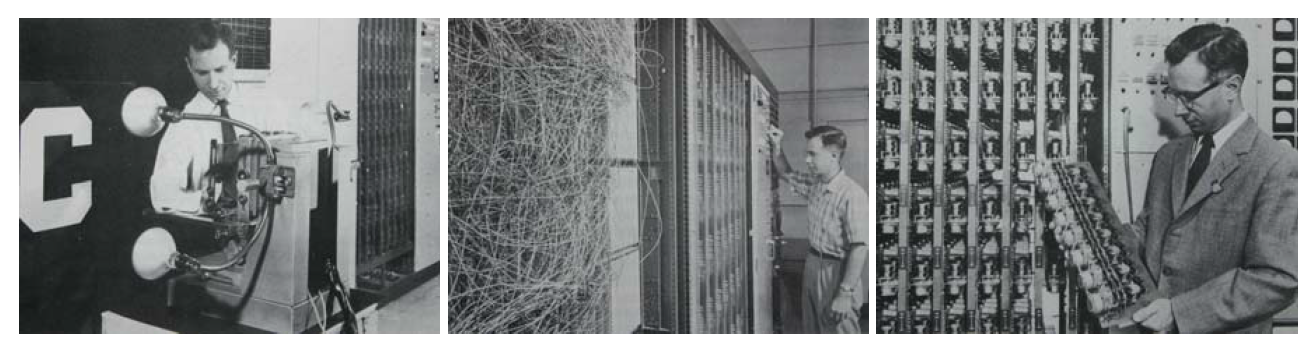

<center>图4.8 Mark 1感知器硬件示意图。左边的照片显示了如何使用一个简单的摄像系统获得输入，在这种情况下，输入场景是一个打印字符，由强光照亮，图像聚焦到20×20的硫化镉光电管阵列上，得到原始的400像素图像。感知器还有一个接线板，如中间的照片所示，允许尝试不同的输入特征配置。与现代数字计算机相比，它们通常是随机连接的，以展示感知者在不需要精确连接的情况下学习的能力。右边的照片显示了一个自适应权重的框架。每一个重量都是使用一个旋转可变电阻（也称为电位计）来实现的，由电动机驱动，从而允许重量值通过学习算法自动调整。</center>

同时感知机被开发出来，一个接近的相关系统称作adaline，它是"自适应式线性单元"的简称，已经被Widrow和他的同事发现。模型的功能形式与感知机差不多，但是采用了不同的方法（Widrow和Hoff，1960年；Widrow和Lehr，1990年）。

#### 4.2 概率生成模型

现在我们转到分类的概率视角，证明带线性决策边界的概率模型是如何从关于数据分布的简单假设中产生的。在1.5.4节，我们讨论了对于分类判别和生成方法的区别。这里我们将采用一个生成模型，建模带有先验的$p(\mathcal{C}_k)$的类条件密度$p(\mathbf{x}\mid\mathcal{C}_k)$，使用这些通过贝叶斯定理计算后验概率$p(\mathcal{C}_k \mid \mathbf{x})$。

首先考虑所有二分类的例子。类别$\mathcal{C}_1$的后验概率可以写成

$$\begin{align*}
p(\mathcal{C}_1 \mid \mathbf{x}) &= \frac{p(\mathbf{x} \mid \mathcal{C}_1)p(\mathcal{C}_1)}{p(\mathbf{x} \mid \mathcal{C}_1)p(\mathcal{C}_1) + p(\mathbf{x} \mid \mathcal{C}_2)p(\mathbf{C}_2)} \\
&= \frac{1}{1+\text{exp}(-a)} = \sigma(a)
\end{align*}$$

其中我们定义

$$a = \ln\frac{p(\mathbf{x} \mid \mathcal{C}_1)p(\mathcal{C}_1}{p(\mathbf{x} \mid \mathcal{C}_2)p(\mathbf{C}_2)}$$

$\sigma(a)$是逻辑sigmoid函数定义如下

$$\sigma(a)=\frac{1}{1+\text{exp}(-a)}$$

<center>图4.9 画的是由4.59定义的逻辑sigmoid函数$\sigma(a)$，以红色显示，和与一定概率缩放的缩放的函数$\Phi(\lambda a)$，对于$\lambda^2=\pi/8$，显示成间隔蓝色，其中$\Phi(a)$是由4.114定义。缩放因子$\pi/8$的选择是为两个曲线的导数对于$a=0$时可以相等。</center>

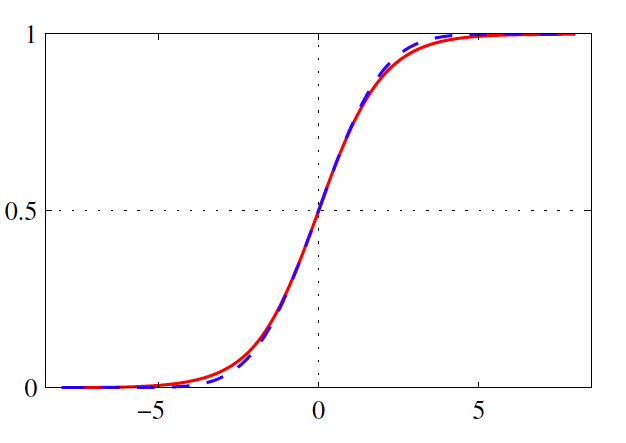

如图4.9所示。sigmoid项意味着S型。这类函数有时候称作"压缩函数"，是因为它会将所有的实数轴映射到一个有限区间内。逻辑sigmoid已经在之前的章节中涉及到过，在许多分类算法中占据重要地位。它满足如下对称特性

$$\sigma(-a)=1-\sigma(a)$$

之前也证明过。逻辑回归的逆如下给出

$$a=\ln\bigr(\frac{\sigma}{1-\sigma}\bigr)$$

称作logit函数。它表达的是二分类的概率对数率$\ln[p(\mathcal{C}_1\mid\mathbf{x})/p(\mathcal{C}_2\mid\mathbf{x})]$，也称作对数odds。

需要注意的是在4.57中，我们以一种等价的形式重写了后验概率，所以逻辑sigmoid的出现会显得相当的空洞。但，如果$a(\mathbf{x})$采用简单的函数形式，则它将具有重要意义。待会儿我们将考虑$a(\mathbf{x})$是$\mathbf{x}$的线性函数的情形，在这个里面侯艳概率是由广义线性模型控制的。

对于$K > 2$类别的例子，我们有

$$\begin{align*}
p(\mathcal{C}_k \mid \mathbf{x}) &= \frac{p(\mathbf{x} \mid \mathcal{C}_k)p(\mathcal{C}_k)}{\sum_jp(\mathbf{x}\mid\mathcal{C}_j)p(\mathcal{C}_j)}\\
&= \frac{\text{exp}(a_k)}{\sum_j\text{exp}(a_j)}
\end{align*}$$

这称为正规化指数，可以认为是多分类的逻辑回归sigmoid的泛化。这里量$a_k$被定义成

$$a_k = \ln p(\mathbf{x} \mid \mathcal{C}_k)p(\mathcal{C}_k)$$

标准化指数也称作softmax函数，它表达的是max函数的平滑版本，是因为，如果对于所有$j≠k$，$a_k \gg a_j$，那么$p(\mathcal{C}\mid\mathbf{x}) \simeq 1$，和$p(\mathcal{C}_j \mid \mathbf{x}) \simeq 0$。

我们现在研究下为条件密度选择特定形式的后果，先看下连续输入变量$\mathbf{x}$，然后再简单讨论离散输入的例子。

#### 4.2.1 连续输入

让我们假设类条件密度是高斯，然后从后验分布中探索结果形式。开始，我们假设所有类别都共享同样的协方差矩阵。因此类别$\mathcal{C}_k$的密度如下给出

$$p(\mathbf{x} \mid \mathcal{C}_k) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}}\text{exp}\left\{-\frac{1}{2}\bigr(\mathbf{x}-\mathbf{\mu}_k\bigr)\mathbf{\Sigma}^{-1}\bigr(\mathbf{x}-\mathbf{\mu}_k\bigr)\right\}$$

首先考虑二分类的例子。从4.57和4.58中，我们有

$$p(\mathcal{C}_1 \mid \mathbf{x}) = \sigma(\mathbf{w}^{\mathsf{T}}\mathbf{x} + w_0)$$

其中我们已经定义了

$$\mathbf{w} = \mathbf{\Sigma}^{-1}\bigr(\mathbf{\mu}_1-\mathbf{\mu}_2\bigr)$$

$$w_0 = -\frac{1}{2}\mathbf{\mu}_1^\mathsf{T}\mathbf{\Sigma}^{-1}\mathbf{\mu}_1 + \frac{1}{2}\mathbf{\mu}_2^\mathsf{T}\mathbf{\Sigma}^{-1}\mathbf{\mu}_2 + \ln\frac{p(\mathcal{C}_1)}{p(\mathcal{C}_2)}$$

我们看到高斯密度指数项中的二次型中的$\mathbf{x}$消掉了（由于假设的是相同的协方差矩阵）导致了一个在逻辑回归sigmoid中的$\mathbf{x}$的线性函数。结果如图4.10中的二维输入向量$\mathbf{x}$的例子。沿着后验概率$p(\mathcal{C}_k \mid \mathbf{x})$的结果决策边界相应的平面是常量，所以将由$\mathbf{x}$的线性函数给出，因此决策边界在输入空间中也是线性的。先验概率$p(\mathcal{C}_k)$仅通过偏置参数$w_0$进入，因此先验的变化具有使决策边界平行移动的作用，更广泛地说，具有恒定后验概率的平行轮廓的作用。

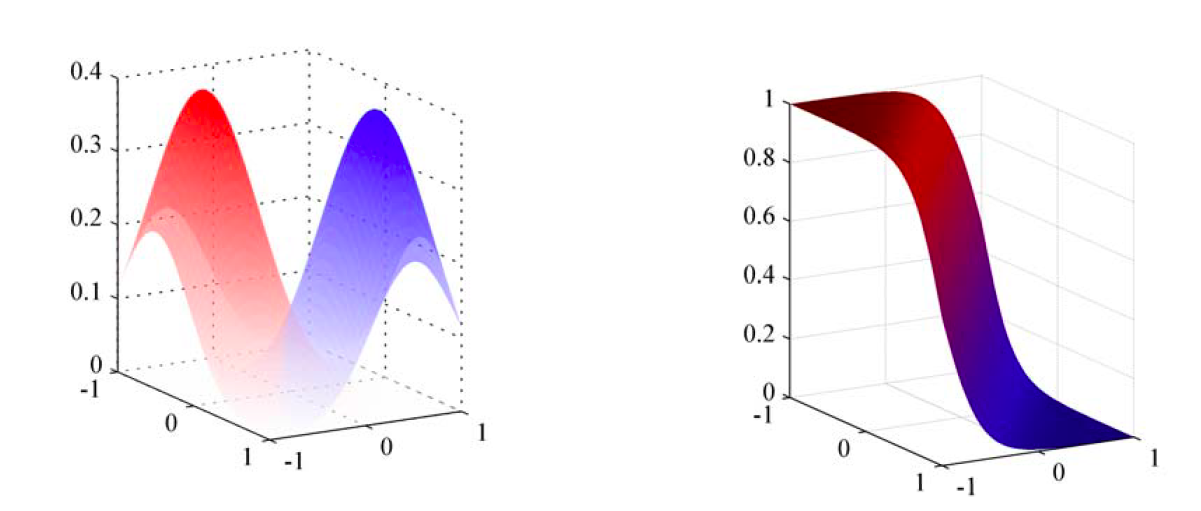

<center>图4.10 左图显示是二分类的类条件密度，表示成红色和蓝色。右边是其对应的后验概率$p(\mathcal{C}_1\mid\mathbf{x})$，它是由$\mathbf{x}$的线性逻辑sigmoid函数给出的。右边的表面是使用按比例的红粉颜色由$p(\mathcal{C}_1\mid\mathbf{x})$和一个由$p(\mathcal{C}_2\mid\mathbf{x})=1-p(\mathcal{C}_1\mid\mathbf{x})$等比例蓝粉颜色给出的。</center>

对于$K$分类通用例子我们有，从4.62和4.63中，

$$a_k(\mathbf{x})=\mathbf{w}_k^\mathsf{T}\mathbf{x} + w_0$$

其中我们定义了

$$\mathbf{w}_k = \mathbf{\Sigma}^{-1}\mathbf{\mu}_k$$

$$w_{k0}=-\frac{1}{2}\mathbf{\mu}_k^{\mathsf{T}}\mathbf{\Sigma}^{-1}\mathbf{\mu}_k + \ln p(\mathcal{C}_k)$$

我们看到$a_k(\mathbf{x})$仍然是$\mathbf{x}$的线性函数作为一个二次型因为共享协方差矩阵而消掉的结果。当两个后验概率（两个最大概率）相等时，就会产生于最小错误分类率相对应的决策边界，因此将由$\mathbf{x}$的线性函数定义，因此我们又建立了一个广义线性模型。

如果我们放弃对贡献协方差矩阵的假设，运行每个类条件密度$p(\mathbf{x}\mid\mathcal{C}_k)$有各自的协方差矩阵$\mathbf{\Sigma}_k$，那么之前取消的也不会发生，我们将得到关于$\mathbf{x}$的二次型，给出二次型判别式。线性和二次型判别式如图4.11所示。

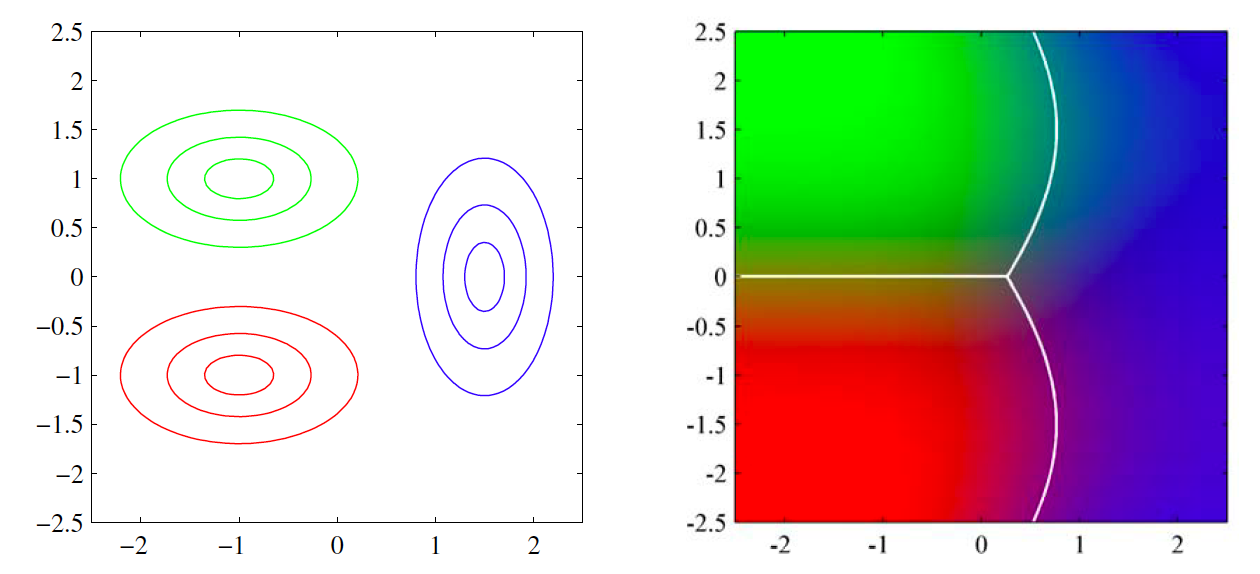

<center>图4.11 左图显示的是三分类类条件概率密度，每个类别都有一个高斯分布，红色，绿色和蓝色，红色和绿色有同样的协方差矩阵。右边显示的是对应的后验概率，RGB颜色向量表示的是三个类别各自的后验概率。决策边界也会显示出来。注意到的是红色和绿色类别中的决策边界有着同样的协方差矩阵，是线性的，然而其它类对之间是二次型的。</center>


#### 4.2.2 最大似然解

一旦我们指定了类条件密度$p(\mathbf{x} \mid \mathcal{C}_k)$的参数化功能形式，我们就可以定义参数值，协同先验条件概率$p(\mathcal{C}_k)$使用最大似然。这需要一个数据集，其中包括$\mathbf{x}$的观测值及其相应的类标签。

首先考虑二分类的例子，每个都有一个高斯类条件密度共享协方差矩阵，假设我们有一个数据集$\{\mathbf{x}_n,t_n\}$，其中$n=1,\cdots,N$。这里$t_n=0$表示的是类别$\mathcal{C}_2$。我们表示先验类概率$p(\mathcal{C}_1)=\pi$，所以$p(\mathcal{C}_2)=1-\pi$。对于来自类别$\mathcal{C}_1$的数据点$\mathbf{x}_n$，我们有$t_n=1$，因此

$$p(\mathbf{x}_n, \mathcal{C}_1) = p(\mathcal{C}_1)p(\mathbf{x}_N \mid \mathcal{C}_1)=\pi\mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_1, \mathbf{\Sigma})$$

类似的类别$\mathcal{C}_2$，我们有$t_n=0$，因此

$$p(\mathbf{x}_n, \mathcal{C}_2) = p(\mathcal{C}_2)p(\mathbf{x}_N \mid \mathcal{C}_2)=(1-\pi)\mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_2, \mathbf{\Sigma})$$

因此似然函数如下给出

$$p(\mathbf{t}\mid\pi, \mathbf{\mu}_1, \mathbf{\mu}_2, \mathbf{\Sigma}) = \prod_{n=1}^N\bigr[\pi\mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_1, \mathbf{\Sigma})\bigr]^{t_n}\bigr[(1-\pi)\mathcal{N}(\mathbf{x}_n \mid \mathbf{\mu}_2, \mathbf{\Sigma})\bigr]^{1-t_n}$$

其中$\mathbf{t}=(t_1,\cdots,t_N)^{\mathsf{T}}$。一般的，很方便最大化对数似然函数。首先考虑对$\pi$的最大化。对数函数中依赖于$\pi$的项时

$$\sum_{n=1}^N\bigr\{t_n\ln\pi + \bigr(1-t_n\bigr)\ln\bigr(1-\pi\bigr)\bigr\}$$

令对$\pi$的导数为0，整理，我们得到

$$\pi=\frac{1}{N}\sum_{n=1}^Nt_n=\frac{N_1}{N}=\frac{N_1}{N_1+N_2}$$

其中$N_1$表示的是类别$\mathcal{C}_1$中所有数据点数，$N_2$表示的是类别$\mathcal{C}_2$中所有数据点数。因此对于$\pi$的最大似然评估是类别$\mathcal{C}_1$的期望的分数。这个结果也很容易扩展到多分类的例子中，其中先验概率关联的类别$\mathcal{C}_k$的最大似然评估是由分配到指定类别的训练数据集的点的分数。

现在考虑对于$\mathbf{\mu}_1$的最大化。我们再次去依赖于$\mathbf{\mu}_1$的这些项的对数似然函数，给出如下

$$\sum_{n=1}^Nt_n\ln\mathcal{N}(\mathbf{x}_n\mid\mathbf{\mu}_1,\mathbf{\Sigma})=-\frac{1}{2}t_n(\mathbf{x}_n-\mathbf{\mu}_1)^{\mathsf{T}}\mathbf{\Sigma}^{-1}(\mathbf{x}_n-\mathbf{\mu}_1) + \text{const}$$

对$\mathbf{\mu}_1$求导并令其为0，整理，我们得到

$$\mathbf{\mu}_1 = \frac{1}{N_1}\sum_{n=1}^Nt_n\mathbf{x}_n$$

它是所有输入向量$\mathbf{x}_n$分配给类别$\mathcal{C}_1$的均值。相似的，对应的对于$\mathbf{\mu}_2$的结果如下

$$\mathbf{\mu}_2 = \frac{1}{N_1}\sum_{n=2}^N(1-t_n)\mathbf{x}_n$$

这一样也是所有输入向量$\mathbf{x}_n$分配给类别$\mathcal{C}_2$的均值。

最终，考虑共享协方差矩阵$\mathbf{\Sigma}$的最大似然解。取出依赖于$\mathbf{\Sigma}$的对数似然函数项，我们有

$$\begin{align*}
&-\frac{1}{2}\sum_{n=1}^Nt_n\ln|\mathbf{\Sigma}| - \frac{1}{2}t_n(\mathbf{x}_n-\mathbf{\mu}_1)^{\mathsf{T}}\mathbf{\Sigma}^{-1}(\mathbf{x}_n-\mathbf{\mu}_1)\\
&-\frac{1}{2}\sum_{n=1}^N(1-t_n)\ln|\mathbf{\Sigma}| - \frac{1}{2}(1-t_n)(\mathbf{x}_n-\mathbf{\mu}_2)^{\mathsf{T}}\mathbf{\Sigma}^{-1}(\mathbf{x}_n-\mathbf{\mu}_2)\\
&=-\frac{N}{2}\ln|\mathbf{\Sigma}|-\frac{N}{2}\text{Tr}\bigr\{\mathbf{\Sigma}^{-1}\mathbf{S}\bigr\}
\end{align*}$$

其中我们定义了

$$\mathbf{S} = \frac{N_1}{N}\mathbf{S}_1 + \frac{N_2}{N}\mathbf{S}_2$$

$$\mathbf{S}_1 = \frac{1}{N_1}\sum_{n\in\mathcal{C}_1}(\mathbf{x}_n - \mathbf{\mu}_1)(\mathbf{x}_n - \mathbf{\mu}_1)^{\mathsf{T}}$$

$$\mathbf{S}_2 = \frac{1}{N_2}\sum_{n\in\mathcal{C}_2}(\mathbf{x}_n - \mathbf{\mu}_2)(\mathbf{x}_n - \mathbf{\mu}_2)^{\mathsf{T}}$$

使用高斯分布最大似然解的标准化结果，我们看到$\mathbf{\Sigma}=\mathbf{S}$，它表示的关联到每个类别的各自的协方差矩阵的权重均值。

这个结果可以很容易地扩展到$K$类别问题得到每个类条件密度是共享协方差矩阵的高斯的相应的参数最大似然解。需要注意的是拟合高斯分布的方法到类别对于离群点来说并不是鲁棒的，因为高斯的最大似然评估也不是鲁棒的。

#### 4.2.3 离散特征

让我们现在考虑离散特征值$x_i$。为了简单起见，我们开始使用一个二进制特征值$x_i \in \{0,1\}$，待会儿讨论扩展到更加通用的离散特征。如果有$D$输入，那么一个通用分布对应着一个每个类别的$2^D$数目的表，包含$2^D-1$的独立性变量（由于加和约束）。因为这个是以特征数为指数级增长的，我们可能需要寻找一个更加严格的表达。这里我们将使用朴素贝叶斯假设，它的特征值被认为是相互独立的，条件约束于类别$\mathcal{C}_k$。因此我们有类条件分布的形式如下

$$p(\mathbf{x}\mid\mathcal{C}_k)=\prod_{i=1}^D\mu_{ki}^{x_i}(1-\mu_{ki})^{1-{x_i}}$$

每个类别包含$D$个独立参数。代入到4.63会得到

$$a_k(\mathbf{x})=\sum_{i=1}^D\{x_i\ln\mu_{ki}+(1-x_i)\ln(1-\mu_{ki})\}+\ln p(\mathcal{C}_k)$$

它依然是值$x_i$的线性函数。对于$K=2$类别的例子，我们也可以考虑由4.57给出的逻辑sigmoid公式。对于离散变量每个都可以取$M>2$的状态的相似结果的获取。

#### 4.2.4 指数家族

如我们看到的，对于所有的高斯分布和离散输入，后验类概率是由广义线性模型逻辑sigmoid（$K=2$类别）或softmax（$K\ge2$类别）激活函数给出的。这些特例更加通用的结果是由假定类条件密度$p(\mathbf{x} \mid \mathcal{C}_k)$是指数家族分布的成员获得的。

使用指数家族成员形式2.194，我们看到$\mathbf{x}$的分布可以写成如下形式

$$p(\mathbf{x}\mid\mathbf{\lambda}_k)=h(\mathbf{x})g(\lambda_k)\text{exp}\{\lambda_k^{\mathsf{T}}\mathbf{u}(\mathbf{x})\}$$

我们现在局限于关注这种分布的子类有$\mathbf{u}(\mathbf{x})\}=\mathbf{x}$。然后我们用2.236引入一个缩放参数$s$，所以我们会得到指数加载类条件密度的限制性集合形式

$$p(\mathbf{x}\mid\mathbf{\lambda}_k)=\frac{1}{s}h\left(\frac{1}{s}\mathbf{x}\right)g(\lambda_k)\text{exp}\left\{\frac{1}{s}\lambda_k^{\mathsf{T}}\mathbf{x}\right\}$$

需要注意的是我们运行每个类别都有自己的参数向量$\mathbf{\lambda}_k$，但我们假设各个类别是贡献同一个缩放参数$s$的。

对于二分类问题，我们带入这个类条件密度表达式到4.58中，我们看到后验类概率是由逻辑sigmoid扮演的线性函数$a(\mathbf{x})$给出的

$$a(\mathbf{x})=(\lambda_1-\lambda_2)^{\mathsf{T}}\mathbf{x}+\ln g(\lambda_1)-\ln g(\lambda_2) + \ln p(\mathcal{C}_1) - \ln p(\mathcal{C}_2)$$

类似地，对于$K$分类问题，我们带入类条件密度表达式到4.63中给出

$$a_k(\mathbf{x})=\mathbf{\lambda}_k^{\mathsf{T}}\mathbf{x} + \ln g(\mathbf{\lambda}_k) + \ln p(\mathcal{C}_k)$$

所以它仍是$\mathbf{x}$的线性函数。